In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import TIRE.simulate as simulate

## Generate data

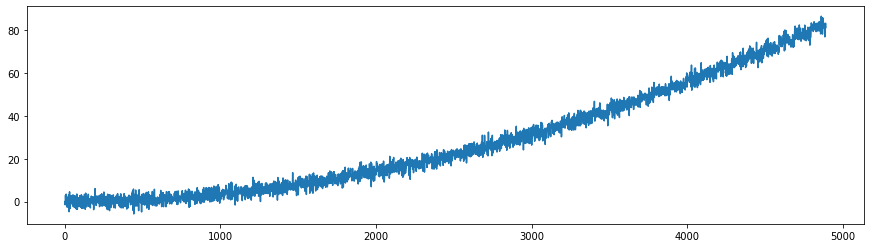

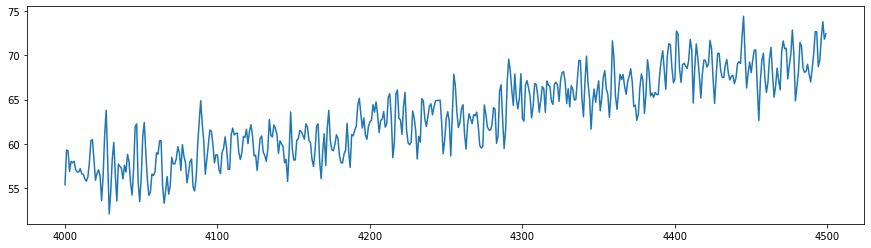

In [8]:
window_size = 20
timeseries, _, parameters = simulate.generate_jumpingmean(window_size)
input_dim = 1 # single tick dimension. 1 for univariate

plt.figure(figsize=(15,4))
plt.plot(timeseries)
plt.show()
plt.figure(figsize=(15,4))
plt.plot(range(4000,4500),timeseries[4000:4500])
plt.show()

## Train the model

In [3]:
from TIRE import TIRE
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TIRE(input_dim=1).to(device)

In [4]:
model.fit(timeseries)

Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Training autoencoder for original timeseries


Loss: 0.81:   0%|          | 0/200 [00:00<?, ?it/s]

Training autoencoder for FFT timeseries


Loss: 0.00:  85%|████████▌ | 170/200 [03:48<00:40,  1.34s/it]


KeyboardInterrupt: 

## Postprocessing and peak detection

In [5]:
dissimilarities, change_point_scores = model.predict(timeseries)

/home/artem/Documents/HSE/TIRE/TIRE/utils.py:334: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0 1 2 ... 4827 4828 4829] in fill_betweenx(). This will become an error two minor releases later.
  ax.fill_between(x, 0, height_line, where=y > 0.0001,


ValueError: operands could not be broadcast together with shapes (4852,) (4830,) 

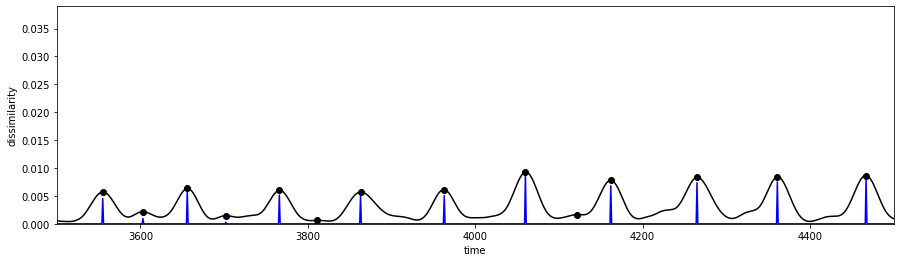

In [9]:
from TIRE import utils

#parameters for plot
time_start = 3500
time_stop = 4500
plot_prominences = True

utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

#parameters for AUC calculation
tol_distances = [5,15,25]
auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)